# Visualizing cross-lingual textual similarity 

In [ ]:
!pip install sentence_transformers datasets transformers umap-learn

     |████████████████████████████████| 81kB 5.5MB/s 
     |████████████████████████████████| 235kB 16.2MB/s 
     |████████████████████████████████| 2.3MB 47.5MB/s 
     |████████████████████████████████| 81kB 12.1MB/s 
     |████████████████████████████████| 1.2MB 40.6MB/s 
     |████████████████████████████████| 245kB 56.1MB/s 
     |████████████████████████████████| 112kB 55.7MB/s 
     |████████████████████████████████| 901kB 36.7MB/s 
     |████████████████████████████████| 3.3MB 40.3MB/s 
     |████████████████████████████████| 1.2MB 42.7MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=facdd051b84d2c2ce0dcebab857c634516c5d595f51d37a6b0126af51fd56f8b
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=ff2183720276076a2f587551d22f98afc8fcc59b1106201390b9f243d5e4

Tatoeba is a collection of sentences and translations.

In [ ]:
from datasets import load_dataset
import pandas as pd
data=load_dataset("xtreme","tatoeba.rus", split="validation")
pd.DataFrame(data)[["source_sentence","target_sentence"]]

Dataset xtreme downloaded and prepared to /root/.cache/huggingface/datasets/xtreme/tatoeba.rus/1.0.0/7bf67e71297af51aebad531f84e824cf5c995d9ce994485f7cd2e90d9cc4d555. Subsequent calls will reuse this data.


,source_sentence,target_sentence
0,"Я знаю много людей, у которых нет прав.\n",I know a lot of people who don't have driver's...
1,"У меня много знакомых, которые не умеют играть...",I know a lot of people who don't know how to p...
2,Мой начальник отпустил меня сегодня пораньше.\n,My boss let me leave early today.\n
3,Я загорел на пляже.\n,I tanned myself on the beach.\n
4,Вы сегодня проверяли почту?\n,Have you checked your email today?\n
...,...,...
995,Что сказал врач?\n,What did the doctor say?\n
996,"Я рад, что ты сегодня здесь.\n",I'm glad you're here today.\n
997,"Фермеры пригнали в деревню пять волов, девять ...",The farmers had brought five oxen and nine cow...
998,Жужжание пчёл заставляет меня немного нервнича...,The buzzing of the bees makes me a little nerv...


In [ ]:
from sentence_transformers import SentenceTransformer 
model = SentenceTransformer("stsb-xlm-r-multilingual") 

In [ ]:
K=30
emb=model.encode(data["source_sentence"][:K]  + data["target_sentence"][:K])
len(emb), len(emb[0])

(60, 768)

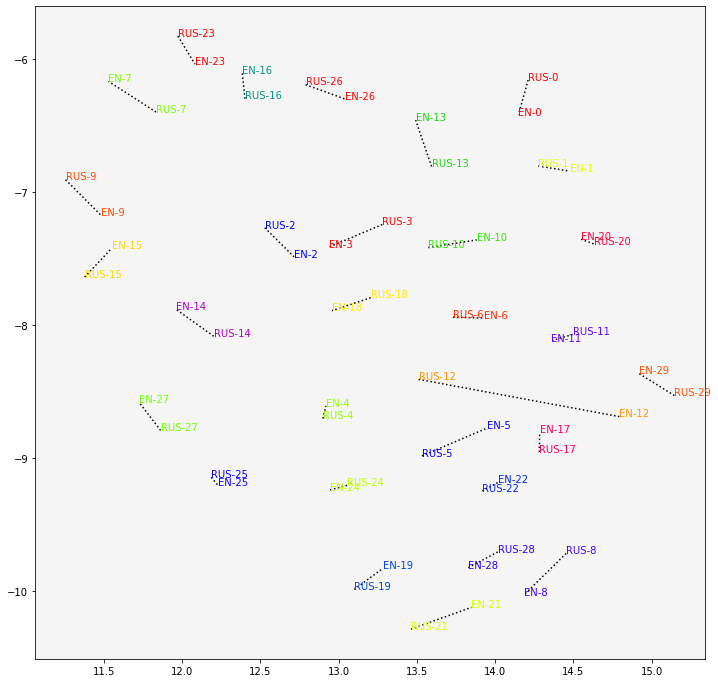

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import umap
import pylab

X= umap.UMAP(n_components=2, random_state=42).fit_transform(emb)
idx= np.arange(len(emb))

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_facecolor('whitesmoke')

cm = pylab.get_cmap("prism")
colors = list(cm(1.0*i/K) for i in range(K))

for i in idx:
    if i<K:
        ax.annotate("RUS-"+str(i), (X[i,0], X[i,1]), c=colors[i])
        ax.plot((X[i,0], X[i+K,0]), (X[i,1], X[i+K,1]), "k:" )
    else:
        ax.annotate("EN-"+str(i%K), (X[i,0], X[i,1]), c=colors[i%K])
      

let us compare entire sentence pairs

In [ ]:
source_emb=model.encode(data["source_sentence"])
target_emb=model.encode(data["target_sentence"])

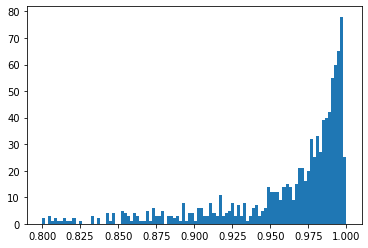

In [ ]:
from scipy import spatial
from matplotlib import pyplot
sims=[ 1 - spatial.distance.cosine(s,t) for s,t in zip(source_emb, target_emb)]
pyplot.hist(sims, bins=100, range=(0.8,1))
pyplot.show()

In [ ]:
np.mean(sims), np.std(sims)

(0.9464540086090565, 0.0825926305536311)